In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import corner
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv('fundamental_plane.csv', index_col='ID')



#definimos las variables que nos interesan
log_re = data.log_re_arcsec
log_sigma = data.log_sigma
mu = data.mu

















#X = np.column_stack((log_sigma, mu))
#y = log_re
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size=0.2, 
#                                                    random_state=42)
#Hasta aquí, se puede decir que vamos relativamente bien.
#A continuación podemos simplemente como hacer la regresión lineal
# Crear una instancia de PolynomialFeatures con grado 5
#poly = PolynomialFeatures(degree=1)

# Ajustar y transformar los datos de entrenamiento
#X_poly_train = poly.fit_transform(X_train)

# Transformar los datos de prueba
#X_poly_test = poly.transform(X_test)



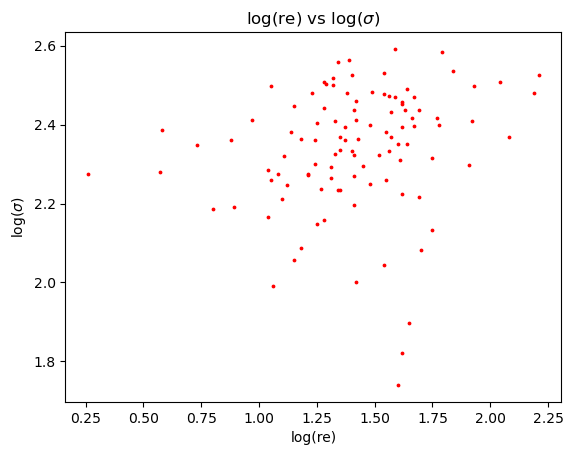

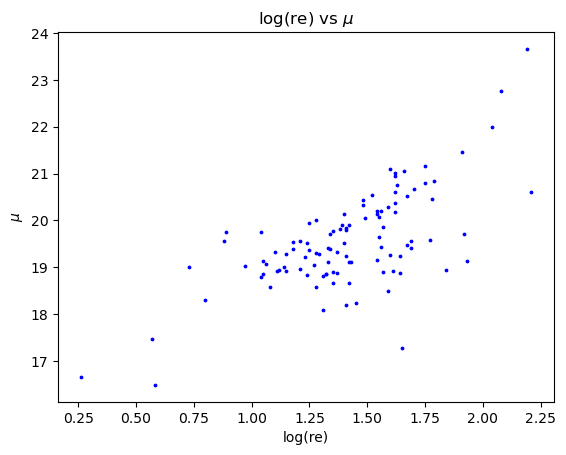

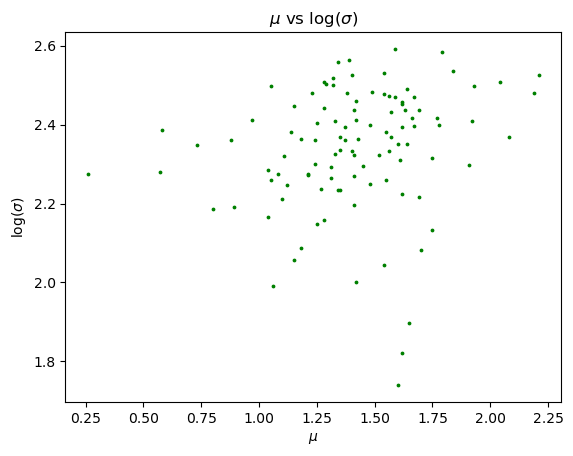

In [126]:
#Lo primero que podemos hacer es graficar pares 'originales' de 
#los 3 parámetros contenidos en los arrays correspondientes, esto 
#para poder visualizar mejor cómo pueden ser las relaciones entre
#las mismas variables.
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(log_re, log_sigma, s=3, color='red')
plt.title('log(re) vs log($\sigma$)')
plt.xlabel('log(re)')
plt.ylabel('log($\sigma$)')
plt.show()

plt.figure(2)
plt.scatter(log_re, mu, s=3, color='blue')
plt.title('log(re) vs $\mu$')
plt.xlabel('log(re)')
plt.ylabel('$\mu$')
plt.show()

plt.figure()
plt.scatter(log_re, log_sigma, s=3, color='green')
plt.title('$\mu$ vs log($\sigma$)')
plt.xlabel('$\mu$')
plt.ylabel('log($\sigma$)')
plt.show()

#A priori con estas imágenes es difícil saber si hay outliers o no los hay.

In [140]:
#1.1 
# Ahora hacemos la primera parte, separando la muestra en una parte
# de test y otra de training.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

X,y,z = log_re, log_sigma, mu 
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=42)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
z = z.to_numpy()

# definir los grados de los polinomios a probar
grados = [1, 2, 3, 4, 5]

# para cada grado, ajustar un modelo y obtener el coeficiente de determinación R^2 y los coeficientes del modelo
for grado in grados:
    poly = PolynomialFeatures(grado)
    X_poly_train = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(poly.transform(X_test))
    print("Grado: ", grado, 
          " Coeficiente de determinación R^2: ", 
          r2_score(y_test, y_pred), " Coeficientes del modelo: ", 
          model.coef_)
    
#De aquí obtenemos que el mejor modelo es o bien el de grado 1 o el
#de grado 2, pero por simplicidad podemos asumir que el grado 1 es el 
#mejor, por el coeficiente de determinación. En particular, podemos de
#cir que a medida que hay mayor grado del polinomio, es menos probable
#que podamos usarlo para predecir puntos, puesto que puede existir
#overfitting, lo que nos lleva a decidirnos por el polinomio grado 1.

Grado:  1  Coeficiente de determinación R^2:  -0.11638392693888333  Coeficientes del modelo:  [0.         0.08468689]
Grado:  2  Coeficiente de determinación R^2:  -0.11953859903333641  Coeficientes del modelo:  [ 0.         -0.10374773  0.07117604]
Grado:  3  Coeficiente de determinación R^2:  -0.1253340303419037  Coeficientes del modelo:  [ 0.          0.19263444 -0.18299601  0.06572648]
Grado:  4  Coeficiente de determinación R^2:  -0.16289618216801727  Coeficientes del modelo:  [ 0.         -1.44301374  2.19091385 -1.29274253  0.26741288]
Grado:  5  Coeficiente de determinación R^2:  -0.24677996692597248  Coeficientes del modelo:  [ 0.          2.90894888 -7.07108865  7.42261558 -3.48323332  0.60197116]


R2 score (grado 1: 0.141
Coeficientes: [0.         0.2006733  0.21031476]
Intercepción: -3.190218462995171


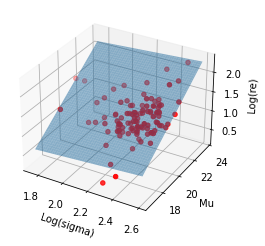

In [2]:
# Crear un modelo de regresión lineal
reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento transformados
reg.fit(X_poly_train, y_train)

# Evaluar el modelo en los datos de prueba transformados
score = reg.score(X_poly_test, y_test)
print(f"R2 score (grado 1: {score:.3f}")
print('Coeficientes:', reg.coef_)
print('Intercepción:', reg.intercept_)

theta0,theta1,theta2=reg.coef_






X, Y = np.meshgrid(np.linspace(log_sigma.min(), log_sigma.max(), 100), 
                   np.linspace(mu.min(), mu.max(), 100))
Z = theta0 + theta1*X + theta2*Y+reg.intercept_

# Gráfica del plano
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(log_sigma, mu, log_re, c='r', marker='o')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_xlabel('Log(sigma)')
ax.set_ylabel('Mu')
ax.set_zlabel('Log(re)')
plt.show()


In [8]:
#Ahora hacemos la parte del lasso regression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
# Crear un modelo de regresión lineal con regularización Lasso de primer grado
lasso_model = make_pipeline(PolynomialFeatures(degree=1), Lasso(alpha=0.1))

# Ajustar el modelo a los datos de entrenamiento
lasso_model.fit(X_train, y_train)

# Obtener las predicciones del modelo para los datos de prueba
y_pred = lasso_model.predict(X_test)

# Calcular el puntaje R^2 del modelo en los datos de prueba
r2 = lasso_model.score(X_test, y_test)
print('R^2:', r2)


# Obtener los coeficientes del modelo
coef = lasso_model.named_steps['lasso'].coef_

# Imprimir los coeficientes
print('Coeficientes:', coef)

R^2: 0.06516345240169541
Coeficientes: [0.         0.         0.13161125]


In [11]:
from sklearn.linear_model import Ridge
# Crear un modelo de regresión lineal con regularización Ridge de primer grado
ridge_model = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=0.1))

# Ajustar el modelo a los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Obtener las predicciones del modelo para los datos de prueba
y_pred = ridge_model.predict(X_test)

# Calcular el puntaje R^2 del modelo en los datos de prueba
#R^2 o coeficiente de determinación es una medida estadística que 
#indica qué porcentaje de la variación en la variable dependiente 
#puede ser explicada por la variable independiente(s) en el modelo 
#de regresión. El valor de R^2 oscila entre 0 y 1, siendo 0 cuando 
#el modelo no explica ninguna variación en la variable dependiente, 
#y 1 cuando el modelo explica toda la variación en la variable 
#dependiente. En general, se considera que un valor de R^2 mayor o
#igual a 0.7 indica un buen ajuste del modelo a los datos.
r2 = ridge_model.score(X_test, y_test)
print('R^2:', r2)


# Obtener los coeficientes del modelo
coef_ridge = ridge_model.named_steps['ridge'].coef_

# Imprimir los coeficientes
print('Coeficientes:', coef_ridge)

R^2: 0.13737150669623832
Coeficientes: [0.         0.19228389 0.21024393]


In [18]:
#Ahora intentamos hacer la penúltima parte de la p1, en donde nos 
#piden ver la Huber regression
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score
#En esencia, el hiperparámetro: un mayor numero de puntos atípicos 
#(outliers) en (el hiperparámetro es epsilon, que en mi caso le di 100)
#los datos podría requerir un valor más alto del hiperparámetro para 
#obtener una buena calidad del modelo




# Crear un modelo de regresión de Huber
huber_model = HuberRegressor(epsilon=100)

# Ajustar el modelo a los datos de entrenamiento
huber_model.fit(X_train, y_train)

# Obtener las predicciones del modelo para los datos de prueba
y_pred = huber_model.predict(X_test)

# Calcular el puntaje R^2 del modelo en los datos de prueba
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)


R^2: 0.14074634216699566


In [179]:
#Ahora la parte 2
import numpy as np
import pandas as pd

# cargamos los datos
data1 = pd.read_csv('M_sigma.csv', delimiter=',', decimal=".")
xx = np.array(data1)


print(xx[:,0][:13])


['-0.279840696594043,0.1,6.61,0.04,"S"'
 '-0.425968732272281,0.015,6.46,0.09,"E"'
 '-0.0969100130080564,0.04,8.18,0.15,"S"'
 '-0.289882634888184,0.094,7,0.3,"S"'
 '0.0191162904470728,0.05,8.23,0.205,"E"'
 '0.0191162904470728,0.05,7.64,0.04,"S0"'
 '0.0563330349511615,0.0155,8.24,0.2,"S0"'
 '0.205339721431523,0.0685,9.17,0.06,"S0"'
 '0.226599905207357,0.08,8.69,0.065,"E"'
 '-0.0579919469776868,0.04,7.15,0.3,"E"'
 '-0.145693958198919,0.035,7.84,0.085,"S"'
 '0.0606978403536116,0.055,8.96,0.17,"S0"'
 '-0.139661993429006,0.035,8.25,0.24,"E"']


In [5]:
#Ahora hacemos la parte 3 
from astroquery.skyview import SkyView
import astropy 
from astropy import units as u
#Download the r-band SDSS dr7 (data release 7) image centered at 
#coordinates: RA 13:29:52.7, DEC +47:11:43s. Download a region of 
#20 × 20 arcmin with a resolution of 0.6 arcseconds per pixel. The
#python package astroquery.skyview is recommended for this

#para calcular la cantidad de píxeles, debemos en realidad pasar de 
#arcominutos (20) a arcosegundos (20x60) y por ende debemos dividir
#20x60 entre la cantidad de arcosegundos por píxel, es decir, 20x60
#por .6 que es igual a 2000 píxeles
SkyView.get_image_list(position='13 29 52.7, +47 11 43', survey='SDSSdr7r',
                       pixels=2000, width=20*u.arcmin, height=20*u.arcmin)

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv36379191979382.fits']

In [6]:
#3.1



#Ahora mismo podemos descargar este link, y luego abriremos el archivo
#con fits.open
from astropy.io import fits
import astropy.io.fits as ft
datos = fits.open('skv36379191979382.fits')
datos.info()



Filename: skv36379191979382.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     136   (2000, 2000)   float32   


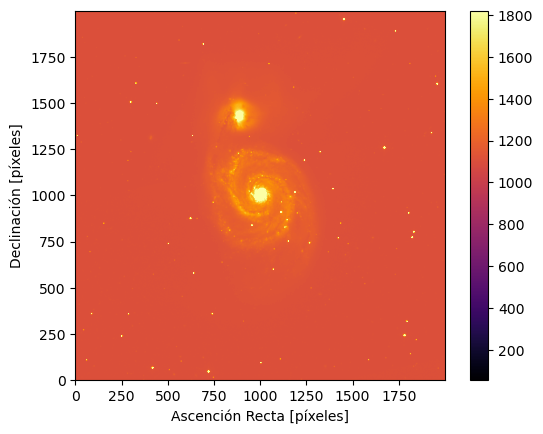

1085.0 36429.0


In [7]:
#3.2




import matplotlib.pyplot as plt
import numpy as np

img = datos[0].data

min_val = np.min(img)
log_min = np.log(min_val)
max_val = np.max(img)
log_max = np.log(max_val)
img1 = plt.imshow(img, cmap='inferno', vmin=min_val/20, vmax=max_val/20)
plt.ylabel('Declinación [píxeles]')
plt.xlabel('Ascención Recta [píxeles]')
plt.gca().invert_yaxis()
plt.colorbar(img1)
plt.show()

print(min_val, max_val)

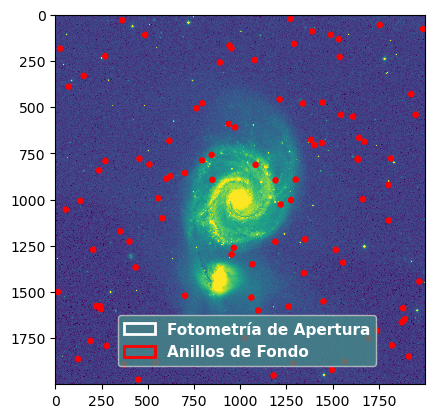

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1    1672     687    87139.944
  2    1926     429    87079.686
  3    1273      22    87004.286
  4     794     788    90464.369
  5    1292     157    87033.274
  6    1557    1341    86972.772
  7      73     389    87132.063
  8     190    1765    86859.277
  9    1352    1215    87399.076
 10     237     842     87110.55
...     ...     ...          ...
 91     486     109    87112.122
 92    1644     666    87067.842
 93     850     893    92775.376
 94     954    1297    89587.504
 95    1084     812    96410.142
 96    1401     705    87200.774
 97     579    1101    87215.724
 98     278    1791    87030.897
 99     435    1367    86940.503
100    1079     245    87157.565
Length = 100 rows
 id xcenter ycenter aperture_sum total_bkg aperture_sum_bkgsub
      pix     pix                                             
--- ------- ------- ------------ --------- -------------------
 

In [114]:
#Un primer paso es estimar el flujo con el fondo local incluido.
import matplotlib.pyplot as plt
from photutils.aperture import ApertureStats
from astropy.visualization import simple_norm
from photutils.aperture import CircularAnnulus, CircularAperture
from photutils.datasets import make_100gaussians_image
from photutils.aperture import aperture_photometry

data = img

x_size, y_size = data.shape

# generar lista de pares aleatorios
num_pares = 100
pares_aleatorios = []
for i in range(num_pares):
    x = np.random.randint(0, x_size)
    y = np.random.randint(0, y_size)
    pares_aleatorios.append((x, y))

#print(pares aleatorios)

#print(data)
positions = pares_aleatorios
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=5, r_out=10)

#print(annulus_aperture)

norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, norm=norm, interpolation='nearest')
#plt.xlim(0, 170)
#plt.ylim(130, 250)

ap_patches = aperture.plot(color='white', lw=2,
                           label='Fotometría de Apertura')
ann_patches = annulus_aperture.plot(color='red', lw=2,
                                    label='Anillos de Fondo')
handles = (ap_patches[0], ann_patches[0])
plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 11})
plt.show()





#Ahora nos interesa calcular el flujo:
#calulo el flujo para cada apertura
aperture_flux = aperture_photometry(data, aperture)['aperture_sum']
#print(aperture_flux, annulus_flux)


aperstats = ApertureStats(data, annulus_aperture)

#este es el background (en unidades de flujo promedio por pixel),
#dentro del anillo de cada uno de las aperturas.
bkg_mean = aperstats.mean
#print(bkg_mean, len(bkg_mean)) 

from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)



aperture_area = aperture.area_overlap(data)

#esto es lo que le queremos restar al aperture_flux
total_bkg = bkg_mean * aperture_area
#print(total_bkg)  



#lo substraído finalmente es esto:
phot_bkgsub = phot_table['aperture_sum'] - total_bkg

#y queremos mostrarlo en una tabla:
phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

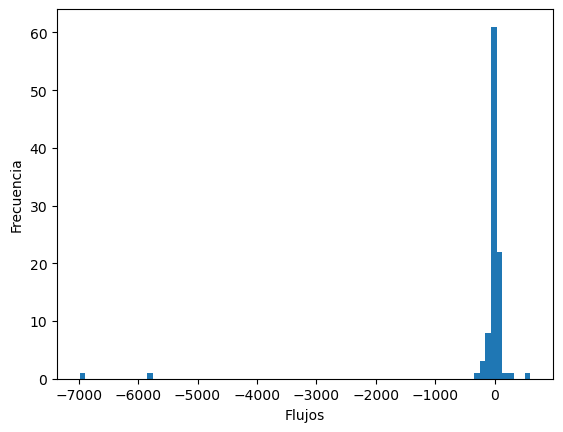

In [11]:
import matplotlib.pyplot as plt
# Histograma de los flujos
plt.hist(phot_bkgsub, bins=80)

# Etiquetas de los ejes x e y
plt.xlabel('Flujos')
plt.ylabel('Frecuencia')

# Muestra la gráfica. Como se puede ver, la distribución se aproxima a una gaussiana, pues tiene tanto 
#una media como un ancho de desviación estándar.
plt.show()

In [12]:
#3.3


#Ahora lo que queremos es calcular la desviación estandar de estos flujos (que están en una unidad cualquier de flujo), y con 
#ello el 5*sigma level:
std_flux = np.std(phot_bkgsub)
lim_flux = 5 * std_flux

print("El flujo límite de 5σ es: ", lim_flux, " unidades de la imagen")

El flujo límite de 5σ es:  4530.030435198858  unidades de la imagen


In [75]:
#3.4 ahora lo que haremos es buscar las fuentes compactas, y lo haremos usando photutils.detections (package)
#además iremos creando una máscara para excluir la región central de la galaxia Whirlpool, escogiendo un 
#criterio de exclusión 5 sigma.


from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image

data = img 
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std)) 

(1110.1582, 1110.0, 6.3866167)


In [23]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # for consistent table output
sources.pprint(max_width=76)  

 id  xcentroid ycentroid sharpness roundness1 ... sky    peak   flux  mag 
---- --------- --------- --------- ---------- ... ---- ------- ----- -----
   1    371.03      1.14      0.35      -0.08 ... 0.00   78.00  2.07 -0.79
   2    627.56      1.94      0.48       0.57 ... 0.00   62.00  1.92 -0.71
   3   1222.75      4.02      0.41      -0.25 ... 0.00  122.00  2.87 -1.14
   4   1784.57     11.12      0.58      -0.46 ... 0.00  100.00  2.28 -0.90
   5    747.54     14.75      0.64       0.01 ... 0.00 2025.00 53.47 -4.32
   6    656.61     21.91      0.55       0.25 ... 0.00   87.00  2.02 -0.77
   7    370.87     24.13      0.63      -0.18 ... 0.00  186.00  5.01 -1.75
   8    652.70     26.14      0.38      -0.06 ... 0.00   92.00  2.25 -0.88
   9    993.95     27.41      0.58       0.23 ... 0.00   47.00  1.11 -0.11
  10    535.36     30.68      0.50      -0.34 ... 0.00  166.00  2.79 -1.11
 ...       ...       ...       ...        ... ...  ...     ...   ...   ...
1745     71.66   1954.86 

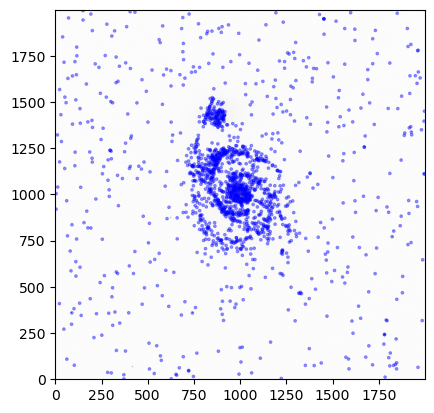

In [25]:
#Dibujamos lo que tentativamente serían las fuentes compactas, asumien
#do que todos los puntos son estrellas (cosa que no niego), pero puede
#ser incorrecto poner en el mismo análisis tanto el contenido de la
#galaxia como lo que está a su alrededor, razón por la cual en el siguien
#te paso ignoraré los puntos de la galaxia al centro de la imagen.
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.show()

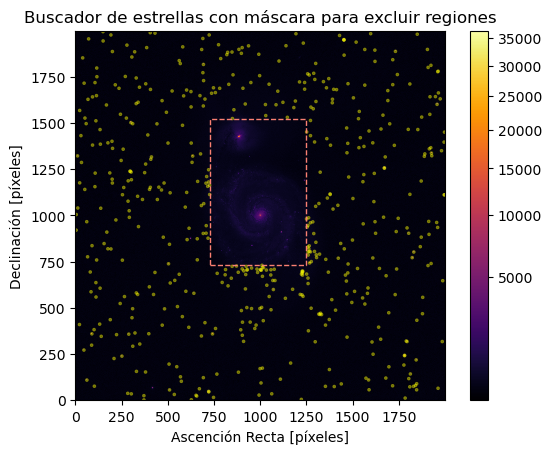

In [113]:
#En mi caso no me limito a tomar unas pocas fuentes, sino todas las 
#que no están dentro de la galaxia whirlpool
import matplotlib.pyplot as plt
import numpy as np
from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture, RectangularAperture
from photutils.datasets import load_star_image
from photutils.detection import DAOStarFinder

data = img
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
daofind = DAOStarFinder(fwhm=3.0, threshold=5.0 * std)
mask = np.zeros(data.shape, dtype=bool)
mask1 = np.zeros(data.shape, dtype=bool)
a1 = 730
a2 = 1520
b1 = 730
b2 = 1250
mask[a1:a2,b1:b2] = True
sources = daofind(data - median, mask=mask)
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
img1 = plt.imshow(data, cmap='inferno',origin='lower', norm=norm,
                  interpolation='nearest')
plt.colorbar(img1)
plt.title('Buscador de estrellas con máscara para excluir regiones')
plt.xlabel('Ascención Recta [píxeles]')
plt.ylabel('Declinación [píxeles]')
apertures.plot(color='yellow', lw=1.5, alpha=0.5)
n1 =int((a2+a1)/2)
n2 =int((b2+b1)/2)
rect1 = RectangularAperture((n2, n1), b2-b1, a2-a1, theta=0)
rect1.plot(color='salmon', ls='dashed')
plt.show()

In [112]:
#Ahora lo que queremos es obtener el noise o desviación estándar, pero 
#esto lo podemos calcular como:
signal = sources['flux']
noise = np.std(sources['flux']-median)
#ahora queremos definir una funcion que tiene los signal-to-noise ratios
#por lo que dividimos cada uno de los terminos del flujo por el ruido
SNR = signal/noise
sources['SNR'] = SNR
#ahora lo que queremos es ver la tabla (y el Signal-to-Noise Ratio SNR)
print(sources)

 id     xcentroid      ...         mag                  SNR         
--- ------------------ ... -------------------- --------------------
  1  371.0287657801079 ...  -0.7922287364917393  0.02652293755502749
  2  627.5623926936719 ...  -0.7093749345144904 0.024574240372756948
  3  1222.750090494937 ...  -1.1435978927298094  0.03665804375814473
  4 1784.5653346166325 ...  -0.8966056725468872     0.02919929711334
  5   747.541618581786 ...   -4.320339929357253    0.683700818694078
  6  656.6123996102805 ...  -0.7656702329007815 0.025882023152354324
  7 370.86540216904865 ...  -1.7487128502595681  0.06400520137472063
  8  652.6954330115767 ...  -0.8790682656564065  0.02873144273794027
  9  993.9467684420736 ...  -0.1086794146180279 0.014131943552275475
 10  535.3583317333179 ...  -1.1144055767903585 0.035685547062635194
...                ... ...                  ...                  ...
519  71.66382970810972 ... -0.27238882448118357 0.016431819588748706
520  689.8140634222618 ...  -0.403